In [94]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [95]:
data = pd.DataFrame(pd.read_csv('datasets/Mall_Customers.csv'))

In [96]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [97]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [99]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [100]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [101]:
data.duplicated().sum()

0

<Axes: >

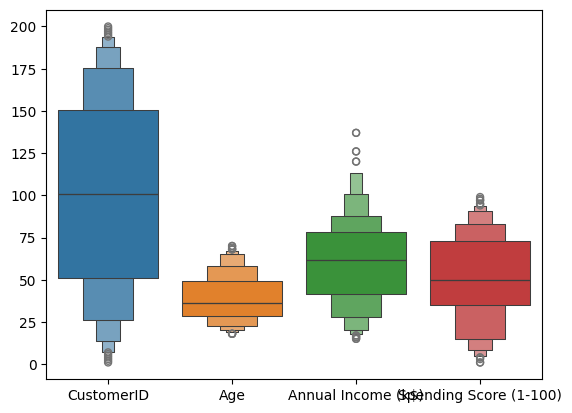

In [102]:
sns.boxenplot(data)

In [103]:
data = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [104]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [105]:
data.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)
data.head()

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0.5, 1.0, 'Income vs Score')

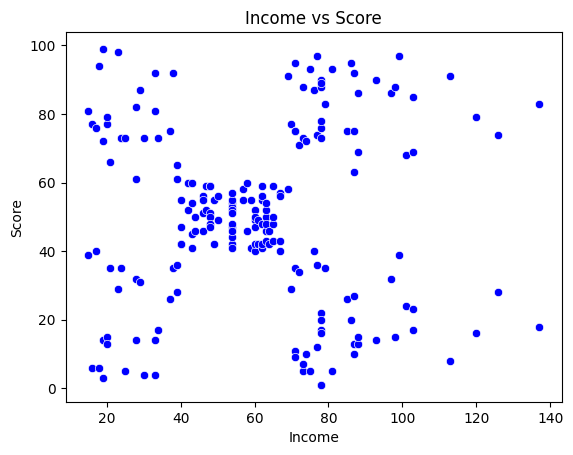

In [106]:
sns.scatterplot(data=data, x='Income', y='Score', color='blue')
plt.title('Income vs Score')

In [107]:
k_values = range(1, 11)
wcss_error = [] # define wcss
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data[['Income', 'Score']])
    wcss_error.append(model.inertia_)
# obtain the wcss to get the elbow method and get the best k value

In [108]:
wcss_error

[269981.28,
 183257.86154461783,
 106348.37306211119,
 98903.20046565279,
 44448.45544793371,
 37271.8862365895,
 30259.65720728547,
 26111.765323182564,
 23760.151956376958,
 22358.307418909593]

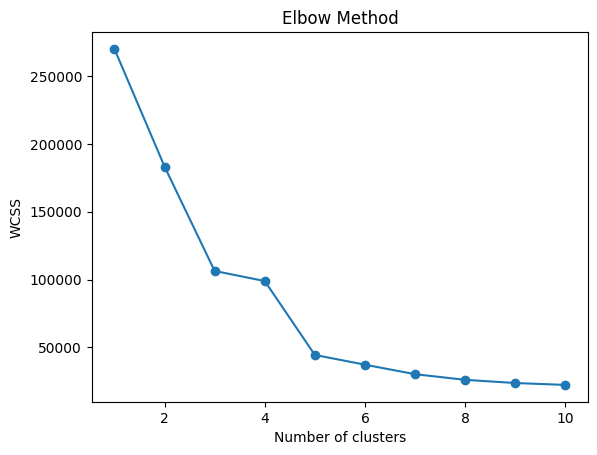

In [109]:
# create the elbow plot
plt.plot(k_values, wcss_error, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [110]:
model = KMeans(n_clusters=5)
pred = model.fit_predict(data)

In [111]:
pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [112]:
data['cluster'] = pred
data.head()

,Income,Score,cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [113]:
c0 = data[data['cluster'] == 0] # Data related to cluster 0

In [114]:
c0.head()

,Income,Score,cluster
43,39,61,0
46,40,55,0
47,40,47,0
48,40,42,0
49,40,42,0


In [115]:
c0 = data[data['cluster'] == 0]
c1 = data[data['cluster'] == 1]
c2 = data[data['cluster'] == 2]
c3 = data[data['cluster'] == 3]
c4 = data[data['cluster'] == 4]

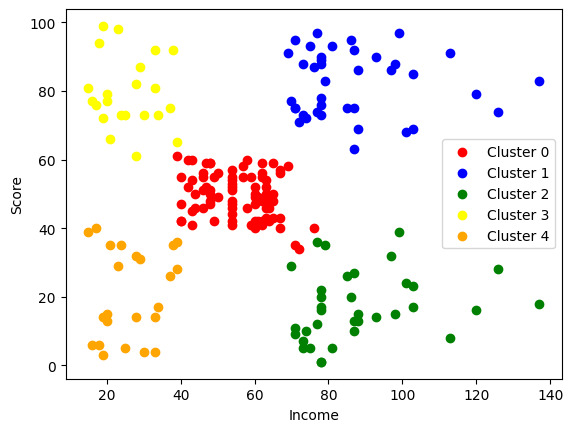

In [116]:
plt.scatter(c0['Income'], c0['Score'], c='red', label='Cluster 0')
plt.scatter(c1['Income'], c1['Score'], c='blue', label='Cluster 1')
plt.scatter(c2['Income'], c2['Score'], c='green', label='Cluster 2')
plt.scatter(c3['Income'], c3['Score'], c='yellow', label='Cluster 3')
plt.scatter(c4['Income'], c4['Score'], c='orange', label='Cluster 4')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()
plt.show()

In [117]:
model.cluster_centers_
# get the cluster centers

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

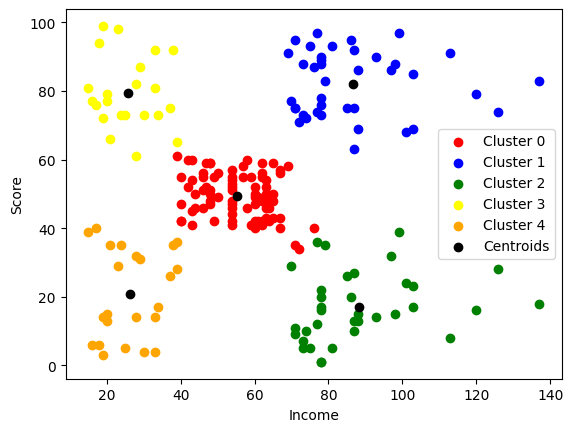

In [118]:
plt.scatter(c0['Income'], c0['Score'], c='red', label='Cluster 0')
plt.scatter(c1['Income'], c1['Score'], c='blue', label='Cluster 1')
plt.scatter(c2['Income'], c2['Score'], c='green', label='Cluster 2')
plt.scatter(c3['Income'], c3['Score'], c='yellow', label='Cluster 3')
plt.scatter(c4['Income'], c4['Score'], c='orange', label='Cluster 4')
plt.xlabel('Income')
plt.ylabel('Score')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='black', label='Centroids')
plt.legend()
plt.show()

**SAME SCENARIO TO IRIS DARASET**

In [119]:
df = pd.DataFrame(pd.read_csv('datasets/iris.csv'))

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [121]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica
